##wine data 에서 type 을 만들어서 학습 
  이진 분류 학습

In [ ]:
#import 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
import seaborn as sns 



In [ ]:
#wine
red = pd.read_csv('/content/winequality-red.csv')
white = pd.read_csv('/content/winequality-white.csv',sep = ';')

In [ ]:
red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#red 인지 white 인지 구분하는 type 컬럼 추가 
red['type'] = 0
white['type'] = 1

In [ ]:
#pd.concat 
wine = pd.concat([red,white])


In [ ]:
wine.head()

In [ ]:
#data_shuffle
wine_shuffle = wine.sample(frac =1)

In [ ]:
wine_np  = wine_shuffle.to_numpy()

In [ ]:
#train_test_index 
train_ratio = 0.8

train_test_index = int(train_ratio * wine.shape[0]) 
train_test_index

5197

In [ ]:
#train_test_split 
train_x ,train_y = wine_np[:train_test_index , :-1] ,wine_np[:train_test_index,-1:] 
test_x,test_y = wine_np[train_test_index:,:-1] , wine_np[train_test_index:,-1:]

In [ ]:
#type 데이터 one_hot_vector 
train_y_to_categorical = tf.keras.utils.to_categorical(train_y,num_classes=2)
test_y_to_categorical = tf.keras.utils.to_categorical(test_y,num_classes = 2)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
#onehot_vector 시킨 버전 
print(train_y_to_categorical.shape)
print(test_y_to_categorical.shape)

(5197, 12)
(5197, 1)
(1300, 12)
(1300, 1)
(5197, 2)
(1300, 2)


In [ ]:
#model 
'''
입력츨 ~ 마지막 전까지 activation = 'swish'
마지막 은 activation = 'sigmoid' = 확률 변수 전용 으로 출력
'''
model = tf.keras.Sequential([
            tf.keras.layers.Dense(units = 48,activation='swish',input_shape = (12,)),
            tf.keras.layers.Dense(units = 24,activation='swish'),
            tf.keras.layers.Dense(units = 12,activation='swish'),
            tf.keras.layers.Dense(units =2 , activation= 'sigmoid')
])

In [ ]:
#model compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
#model fit 
history  = model.fit(train_x,train_y_to_categorical,epochs = 200,batch_size= 32 ,validation_split= 0.2 ,callbacks= tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience= 10))


Epoch 1/200
130/130 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.9690 - val_loss: 0.0908 - val_accuracy: 0.9721
Epoch 2/200
130/130 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9432 - val_loss: 0.1470 - val_accuracy: 0.9519
Epoch 3/200
130/130 [==============================] - 0s 2ms/step - loss: 0.1198 - accuracy: 0.9642 - val_loss: 0.0879 - val_accuracy: 0.9702
Epoch 4/200
130/130 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.9673 - val_loss: 0.1100 - val_accuracy: 0.9644
Epoch 5/200
130/130 [==============================] - 0s 2ms/step - loss: 0.1147 - accuracy: 0.9605 - val_loss: 0.1059 - val_accuracy: 0.9683
Epoch 6/200
130/130 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9685 - val_loss: 0.1216 - val_accuracy: 0.9683
Epoch 7/200
130/130 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9687 - val_loss: 0.0748 - val_accuracy: 0.9769

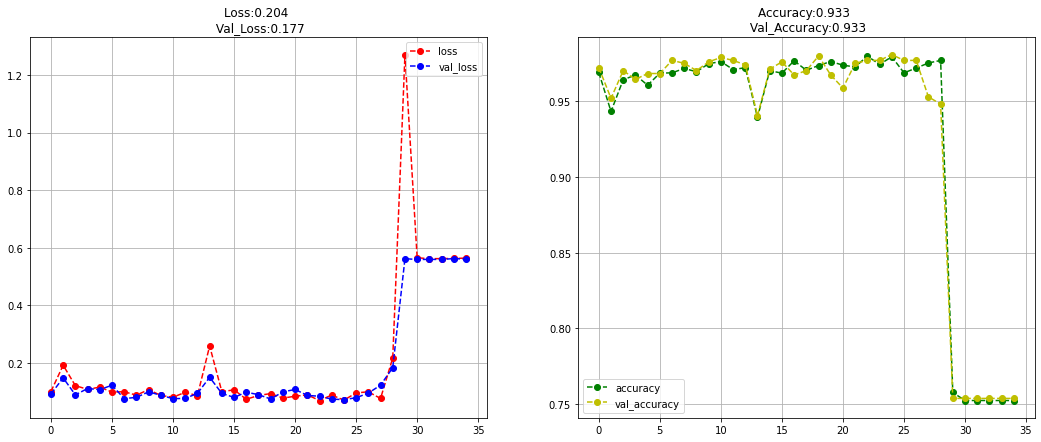

In [ ]:
#시각화
plt.figure(figsize=(18,7))

loss_mean = np.mean(history.history['loss'])
val_loss_mean = np.mean(history.history['val_loss']) 
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'r--o',label = 'loss')
plt.plot(history.history['val_loss'],'b--o',label = 'val_loss')
plt.title('Loss:{:.3f} \n Val_Loss:{:.3f}'.format(loss_mean , val_loss_mean))
plt.legend()
plt.grid()

plt.subplot(1,2,2)
acc_mean = np.mean(history.history['accuracy'])
val_acc_mean = np.mean(history.history['val_accuracy'])
plt.plot(history.history['accuracy'],'g--o',label = 'accuracy')
plt.plot(history.history['val_accuracy'],'y--o',label = 'val_accuracy')
plt.title('Accuracy:{:.3f} \n Val_Accuracy:{:.3f}'.format(acc_mean,val_acc_mean))
plt.legend()
plt.grid()
plt.show()



In [ ]:
#예측
pred_y = model.predict(test_x)
pred_y_argmax = pred_y.argmax(axis = 1)
#print(pred_y_argmax ,test_y)
test_y_to_categorical


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
#평가 
model.evaluate(test_x,test_y_to_categorical)

41/41 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.7585


[0.5540635585784912, 0.7584615349769592]